<a href="https://colab.research.google.com/github/Cullen-Kendrick/Data-Experience/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

df = pd.read_csv("https://raw.githubusercontent.com/Cullen-Kendrick/Data-219/main/clean_data.csv")

*Explination*
---
* Correlation and Feature Selection
 * I repeated use a correlation matrix in order to inform how I construct my
machine learning models. I did this to ensure that the features that ended up in the final model. To visualize that martix I used the seaborn heatmap.
* Parameter Hyper-Tuning
 * For the parameter hyper-tuning I did two things, run through the multiple metrics for KNearestNieghbors. I did to ensure the best predictions possible. And I checked many different numbers of nieghbors. I did this because it can tell me how far spread out these countries are.

# Global View


<Axes: >

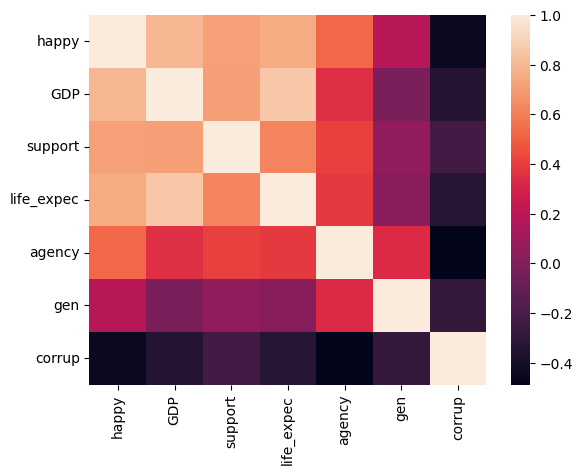

In [ ]:
bare_df = df.drop(columns=['Country name', 'year', 'Region'])
corr = bare_df.corr()
sns.heatmap(corr)

In [ ]:
    # General
gen_x = bare_df[['GDP', 'support', 'life_expec', 'agency', 'gen', 'corrup']]
gen_y = bare_df['happy']

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=gen_x,
    y=gen_y,
    scoring='neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'all factors')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'life_expec']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=gen_x[['GDP', 'support', 'life_expec']],
    y = gen_y,
    scoring= 'neg_mean_squared_error',
    cv = 10)
print(-scores.mean(), 'General 2')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'life_expec', 'agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=gen_x[['GDP', 'life_expec', 'agency']],
    y = gen_y,
    scoring= 'neg_mean_squared_error',
    cv = 10)
print(-scores.mean(), 'General 3')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=gen_x[['GDP']],
    y = gen_y,
    scoring= 'neg_mean_squared_error',
    cv = 10)
print(-scores.mean(), 'General 4')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=gen_x,
    y=gen_y,
    scoring='neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'General 5')

0.3627163171819058 all factors
0.35515932290822155 General 2
0.3746355238817682 General 3
0.4785469195143447 General 4
0.35356879744048847 General 5


In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'life_expec', 'agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=gen_x[['GDP', 'support', 'life_expec', 'agency']],
    y = gen_y,
    scoring= 'neg_mean_squared_error',
    cv = 10)
print(-scores.mean(), 'General Best Features')

0.3443757037554524 General Best Features


In [ ]:
metrics = ['cosine', 'euclidean',
           'l1', 'l2', 'manhattan']
for metric in metrics:
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=10, metric= metric))
    scores = cross_val_score(
      pipeline,
      X=gen_x[['GDP', 'support', 'life_expec', 'agency']],
      y = gen_y,
      scoring= 'neg_mean_squared_error',
      cv = 10)
    print(metric, -scores.mean())
    #best metric is manhattan

cosine 0.43275775862390775
euclidean 0.3443757037554524
l1 0.3416900348276917
l2 0.3443757037554524
manhattan 0.3416900348276917


1 0.5552699391812865
2 0.4570216315729275
3 0.40804861550548494
4 0.38527082491916065
5 0.37593568039656
6 0.3669497496127165
7 0.35745730824961564
8 0.3504427543993486
9 0.34383196110418873
10 0.3416900348276917
11 0.33790135842034197
12 0.3345665612215725
13 0.33126889455969366
14 0.33021693799953317
15 0.32927158593298933
16 0.3281880539933915
17 0.3268857650127541
18 0.3246285072969567
19 0.3241005112050767
20 0.324442584206751
21 0.3249315752074632
22 0.3239865992727159
23 0.3235344399829628
24 0.32357718810450947
25 0.32313151971736087
26 0.3235415849313227
27 0.3234120432130381
28 0.32300806723012887
29 0.3225680451045674
30 0.32194568725871264
31 0.3222380402285703
32 0.321928175351324
33 0.32084964115283304
34 0.3212725182359994
35 0.32137555657146233
36 0.3207438745187382
37 0.3197893802403307
38 0.3204107248341071
39 0.31996986367443336
40 0.31985797089605694
41 0.3203418083283105
42 0.31973524454347235
43 0.31956728615572194
44 0.31929824588950295
45 0.31937697355554023
46 

Text(0, 0.5, 'Test RMSE')

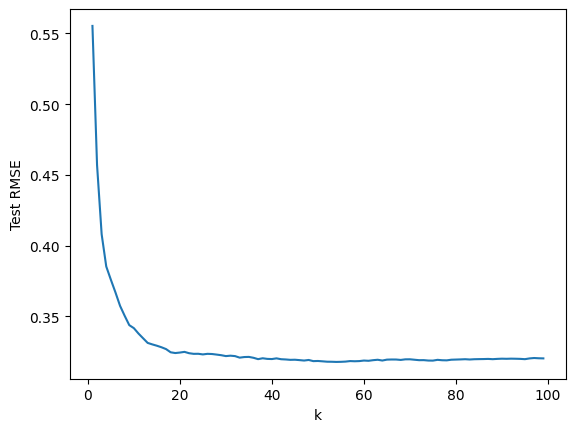

In [ ]:
ks = []
for i in range(1,100):
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=i, metric= 'manhattan'))
    scores = cross_val_score(
      pipeline,
      X=gen_x[['GDP', 'support', 'life_expec', 'agency']],
      y = gen_y,
      scoring= 'neg_mean_squared_error',
      cv = 10)
    avg = -1*(scores.mean())
    ks.append(avg)
    print(i, avg)

line_plot = pd.Series(ks, index=range(1, 100)).plot.line()
line_plot.set_xlabel("k")
line_plot.set_ylabel("Test RMSE")
#best number of neighbors is 54

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'life_expec', 'agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=54, metric= 'manhattan'))

scores = cross_val_score(
    pipeline,
    X=gen_x[['GDP', 'support', 'life_expec', 'agency']],
    y = gen_y,
    scoring= 'neg_mean_squared_error',
    cv = 10)
print(-scores.mean(), 'Optimized General Prediction')

0.3178267550323235 Optimized General Prediction


*Interpretation*
---
1. Correlation and Heatmap: Across Happiness there seems to be high correlation for every variable, and even corruption is negativly correlated which is still a strong relationship.
2. Feature Choice: The best model for prediction includes: GDP, support, life_expec, and agency. This means we can best predict a countries happiness when taking into consideration economic prosperity, community, health and the freedom to make choices.
3. Parameters: The metric for judging this 'manhattan' and the number of nieghbors is 54. This tells me that having a large number of data points that are close together provide the best position to predict the happiness of the country.
4. Error: The mean error for this model is 0.31, meaning that given a countries GPD, community, health, and agency this model could provide a predicted happiness with an error of 0.31 on a ten point scale. That is pretty good predictive power for the entire world!

# South Asia

<Axes: >

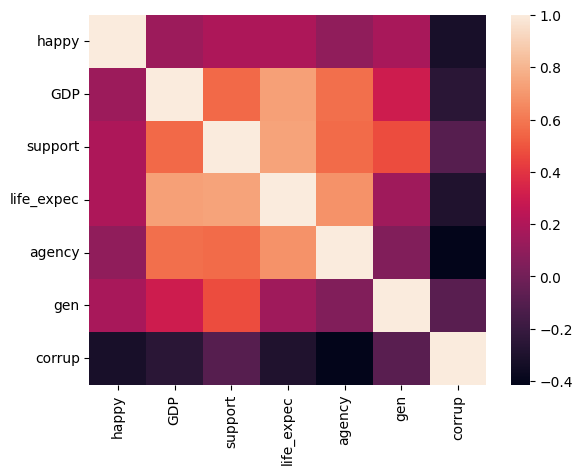

In [ ]:
df_SA = bare_df[df.Region == 'South Asia']
corr_SA = df_SA.corr()
sns.heatmap(corr_SA)

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_SA[['GDP', 'support', 'life_expec', 'agency', 'gen', 'corrup']],
    y = df_SA['happy'],
    cv=10)
print(-scores.mean(), 'SA all factors')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'gen']),
    remainder='drop')
pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors= 10))
scores = cross_val_score(
    pipeline,
    X=df_SA[['GDP', 'support', 'life_expec', 'gen']],
    y = df_SA['happy'],
    scoring= 'neg_mean_squared_error',
    cv = 10)
print(-scores.mean(), 'SA 1')

2.715234730694025 SA all factors
0.5296655356111112 SA 1


In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors= 10))
scores = cross_val_score(
    pipeline,
    X=df_SA[['GDP', 'support', 'life_expec', 'gen']],
    y = df_SA['happy'],
    scoring= 'neg_mean_squared_error',
    cv = 10)
print(-scores.mean(), 'SA Best Features')

0.5296655356111112 SA Best Features


In [ ]:
metrics = ['cosine', 'euclidean',
           'l1', 'l2', 'manhattan']
for metric in metrics:
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=10, metric= metric))
    scores = cross_val_score(
      pipeline,
      X=df_SA[['GDP', 'support', 'life_expec', 'gen']],
      y = df_SA['happy'],
      scoring= 'neg_mean_squared_error',
      cv = 10)
    print(metric, -scores.mean())

cosine 0.6192392815277777
euclidean 0.5296655356111112
l1 0.4496836148611111
l2 0.5296655356111112
manhattan 0.4496836148611111


1 0.4017660708333334
2 0.40400788090277784
3 0.37412642808641977
4 0.3177887890625
5 0.3591718377777779
6 0.38504083422067903
7 0.4095551447562357
8 0.4033585368272569
9 0.4327015293209876
10 0.4496836148611111
11 0.45391839602846645
12 0.4689761907793211
13 0.48219012903517433
14 0.48819605410997735
15 0.4832986715679013
16 0.48066626102973115
17 0.48291551560457535
18 0.48300587458419103
19 0.47654565593644216
20 0.479570010434028
21 0.48077659353426583
22 0.4827701073174932
23 0.47947054241755954
24 0.47717303061824845
25 0.4788395932288889
26 0.4802317795549803
27 0.48118666372313684
28 0.48371687654478474
29 0.49108582324778716


Text(0, 0.5, 'Test RMSE')

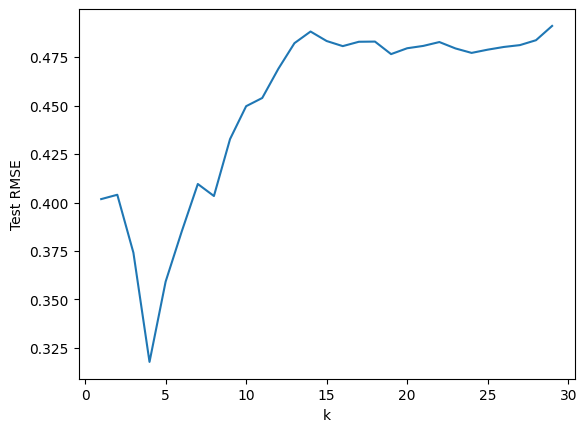

In [ ]:
ks = []
for i in range(1,30):
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=i, metric= 'manhattan'))
    scores = cross_val_score(
      pipeline,
      X=df_SA[['GDP', 'support', 'life_expec', 'gen']],
      y = df_SA['happy'],
      scoring= 'neg_mean_squared_error',
      cv = 10)
    avg = -1*(scores.mean())
    ks.append(avg)
    print(i, avg)

line_plot = pd.Series(ks, index=range(1, 30)).plot.line()
line_plot.set_xlabel("k")
line_plot.set_ylabel("Test RMSE")

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors= 4, metric='manhattan'))
scores = cross_val_score(
    pipeline,
    X=df_SA[['GDP', 'support', 'life_expec', 'gen']],
    y = df_SA['happy'],
    scoring= 'neg_mean_squared_error',
    cv = 10)
print(-scores.mean(), 'Optimized SA')

0.3177887890625 Optimized SA


*Interpretion*
---
1. Correlation and Heatmap: Unfortunatly the correlation between the other variables and happiness are low. However the small differences in correlation do provide some help in creating the model.
2. Feature Choice: The best model for prediction includes: GDP, support, life_expec, and generosity. This means we can best predict a countries happiness when taking into consideration economic prosperity, community, health and the kindness of others.
3. Parameters: The metric for judging this 'manhattan' and the number of nieghbors is 4. This tells me that having a small number of data points that are close together provide the best position to predict the happiness of the country in south asia.
4. Error: The mean error for this model is 0.31, meaning that given a countries GPD, community, health, and generosity this model could provide a predicted happiness with an error of 0.31 on a ten point scale. Considering the correlation between happiness and the other variables, this is pretty good.

# Central and Eastern Europe

<Axes: >

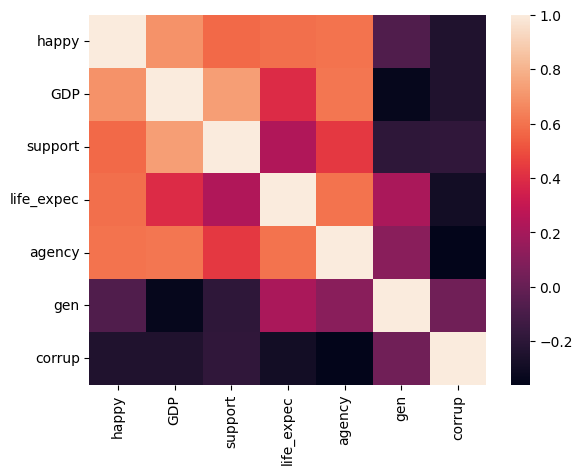

In [ ]:
df_CEE = bare_df[df.Region == 'Central and Eastern Europe']
corr_CEE = df_CEE.corr()
sns.heatmap(corr_CEE)

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_CEE[['GDP', 'support', 'life_expec', 'agency', 'gen', 'corrup']],
    y = df_CEE['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'CEE all factors')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_CEE[['GDP', 'support', 'life_expec', 'agency', 'corrup']],
    y = df_CEE['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'CEE 1')

0.18413355992142852 CEE all factors
0.20762842255000002 CEE 1


In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_CEE[['GDP', 'support', 'life_expec', 'agency', 'gen']],
    y = df_CEE['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'CEE Best Features')

0.18839973741904764 CEE Best Features


In [ ]:
metrics = ['cosine', 'euclidean',
           'l1', 'l2', 'manhattan']
for metric in metrics:
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=10, metric= metric))
    scores = cross_val_score(
      pipeline,
      X=df_CEE[['GDP', 'support',
       'life_expec', 'agency', 'gen', 'corrup']],
      y = df_CEE['happy'],
      scoring= 'neg_mean_squared_error',
      cv = 10)
    print(metric, -scores.mean())

cosine 0.19981183678095232
euclidean 0.18839973741904764
l1 0.19958226383095237
l2 0.18839973741904764
manhattan 0.19958226383095237


1 0.3122090054761905
2 0.2686150345238095
3 0.2485481727248678
4 0.22389566936011907
5 0.21948338261904765
6 0.2140075580224868
7 0.20727703394557823
8 0.2068445303050595
9 0.19912856513521457
10 0.18839973741904764
11 0.18878713522038565
12 0.18430935514219576
13 0.18486600857142857
14 0.18443441241618075
15 0.18237842535132273
16 0.18092036223214286
17 0.18104905521667491
18 0.1796884185155791
19 0.17987397651629072
20 0.17962325884226193
21 0.17900910892020305
22 0.1796111289880953
23 0.18191986394004864
24 0.18147038206845229
25 0.1802160568780951
26 0.1803880107604254
27 0.18057353880331817
28 0.1788821004443026
29 0.1785471639434346


Text(0, 0.5, 'Test RMSE')

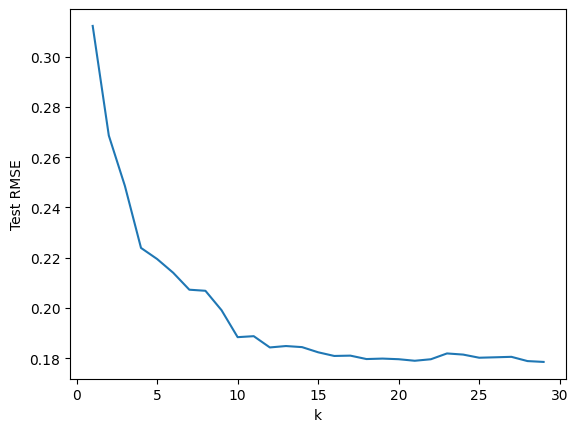

In [ ]:
ks = []
for i in range(1,30):
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=i))
    scores = cross_val_score(
       pipeline,
       X=df_CEE[['GDP', 'support',
        'life_expec', 'agency', 'gen', 'corrup']],
       y = df_CEE['happy'],
       scoring= 'neg_mean_squared_error',
       cv = 10)
    avg = -1*(scores.mean())
    ks.append(avg)
    print(i, avg)

line_plot = pd.Series(ks, index=range(1, 30)).plot.line()
line_plot.set_xlabel("k")
line_plot.set_ylabel("Test RMSE")

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=13))

scores = cross_val_score(
    pipeline,
    X=df_CEE[['GDP', 'support', 'life_expec', 'agency', 'gen', 'corrup']],
    y = df_CEE['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), ' Optimized CEE')

0.1756005300126796  Optimized CEE


*Interpretation*
---
1. Correlation and Heatmap: All variables are highly correlated to happiness other than generosity and corruption.
2. Feature Choice: The features the provide the best predictive power is every feature. This is interesting. Every measure provided in the data set give more and more information to the model.
3. Parameters: The standard parameter and a standard number of neighbors. This tells me the model doesn't need much help as is.
4. Error: The mean error for this model is 0.18, meaning that given every feature of the model, this model can predict the happiness of a country within 0.18 on a ten point scale. This is the lowest error seen in any model so far.

# Middle East and North Africa

<Axes: >

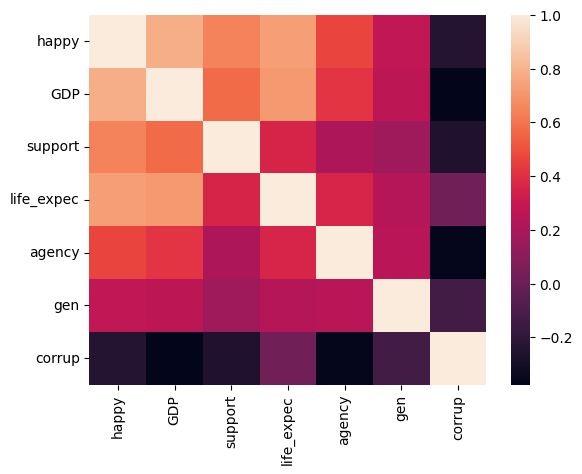

In [ ]:
df_MENA = bare_df[df.Region == 'Middle East and North Africa']
corr_MENA = df_MENA.corr()
sns.heatmap(corr_MENA)

In [ ]:

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_MENA[['GDP', 'support', 'life_expec', 'agency', 'gen', 'corrup']],
    y = df_MENA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'MENA all factors')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_MENA[['GDP', 'support', 'life_expec', 'agency']],
    y = df_MENA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'MENA 1')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_MENA[['GDP', 'support', 'life_expec']],
    y = df_MENA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'MENA 2')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'life_expec']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_MENA[['GDP', 'life_expec']],
    y = df_MENA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'MENA 3')

0.3319312785934067 MENA all factors
0.2988662588461538 MENA 1
0.2395124512197803 MENA 2
0.26892366408791213 MENA 3


In [ ]:
pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))
scores = cross_val_score(
    pipeline,
    X=df_MENA[['GDP', 'support', 'life_expec']],
    y = df_MENA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'MENA Best Features')

0.26892366408791213 MENA Best Features


In [ ]:
metrics = ['cosine', 'euclidean',
           'l1', 'l2', 'manhattan']
for metric in metrics:
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=10, metric= metric))
    scores = cross_val_score(
      pipeline,
      X=df_MENA[['GDP', 'support', 'life_expec']],
      y = df_MENA['happy'],
      scoring= 'neg_mean_squared_error',
      cv = 10)
    print(metric, -scores.mean())

cosine 0.528403535554945
euclidean 0.26892366408791213
l1 0.25593173796153856
l2 0.26892366408791213
manhattan 0.25593173796153856


1 0.31285837087912094
2 0.2792682622252748
3 0.269210725946276
4 0.2555871270604396
5 0.25460993775824176
6 0.2388704770299145
7 0.22384163879793678
8 0.22661410266140117
9 0.24836324839913176
10 0.26892366408791213
11 0.2896602346698758
12 0.29415139232295506
13 0.3059553912413032
14 0.31121936729087263
15 0.31600045813919436
16 0.3228515463985234
17 0.333064960863531
18 0.3453912112196446
19 0.3591491781026454
20 0.3654612816552199
21 0.37047603118786
22 0.37832395317750445
23 0.38728734573838275
24 0.39237888625515105
25 0.39654677508923075
26 0.400505924816308
27 0.4047408139329807
28 0.41391521212155197
29 0.42610233344527054


Text(0, 0.5, 'Test RMSE')

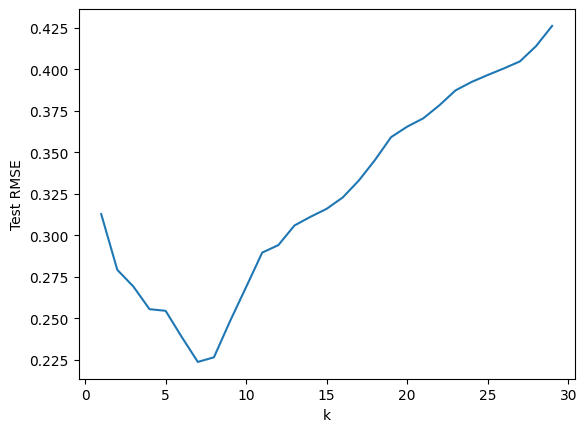

In [ ]:
ks = []
for i in range(1,30):
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=i))
    scores = cross_val_score(
       pipeline,
       X=df_MENA[['GDP', 'support', 'life_expec']],
       y = df_MENA['happy'],
       scoring= 'neg_mean_squared_error',
       cv = 10)
    avg = -1*(scores.mean())
    ks.append(avg)
    print(i, avg)

line_plot = pd.Series(ks, index=range(1, 30)).plot.line()
line_plot.set_xlabel("k")
line_plot.set_ylabel("Test RMSE")

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=8))

scores = cross_val_score(
    pipeline,
    X=df_MENA[['GDP', 'support', 'life_expec']],
    y = df_MENA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'Optimized MENA')

0.20899988517342033 Optimized MENA


*Interpretation*
---
1. Correlation and Heatmap: There is a high correlation between happiness and all other variables in the model.
2. Feature Choice: However, The best model for prediction includes: GDP, support, and life_expec. This means we can best predict a countries happiness when taking into consideration economic prosperity, community, and health.
3. Parameters: The standard parameter and a standard number of neighbors. This tells me the model doesn't need much help as is.
4. Error: The mean error for this model is 0.21, meaning that given a countries GPD, community, health, and agency this model could provide a predicted happiness with an error of 0.21 on a ten point scale.

# Sub-Saharan Africa

<Axes: >

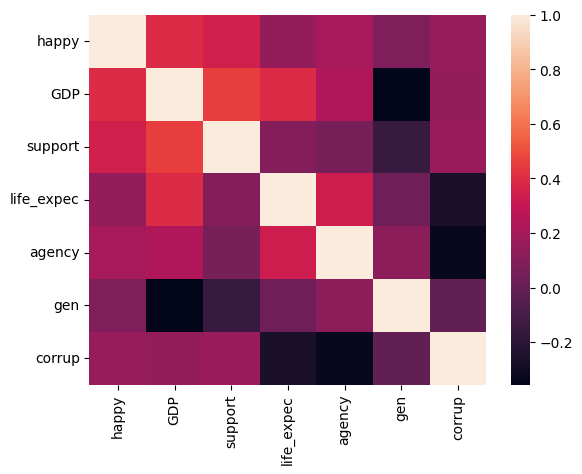

In [ ]:
df_SSA = bare_df[df.Region == 'Sub-Saharan Africa']
corr_SSA = df_SSA.corr()
sns.heatmap(corr_SSA)

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_SSA[['GDP', 'support', 'life_expec', 'agency', 'gen', 'corrup']],
    y = df_SSA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'SSA all factors')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_SSA[['GDP', 'support', 'life_expec', 'agency', 'corrup']],
    y = df_SSA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'SSA 1')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'agency', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_SSA[['GDP', 'support', 'agency', 'gen']],
    y = df_SSA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'SSA 2')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_SSA[['GDP', 'support', 'gen']],
    y = df_SSA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'SSA 3')

0.3705470268689023 SSA all factors
0.38343952806036585 SSA 1
0.3646423619969512 SSA 2
0.36336758335304875 SSA 3


In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_SSA[['GDP', 'support', 'gen']],
    y = df_SSA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'SSA Best Features')

0.36336758335304875 SSA Best Features


In [ ]:
metrics = ['cosine', 'euclidean',
           'l1', 'l2', 'manhattan']
for metric in metrics:
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=10, metric= metric))
    scores = cross_val_score(
     pipeline,
     X=df_SSA[['GDP', 'support', 'gen']],
     y = df_SSA['happy'],
     scoring= 'neg_mean_squared_error',
     cv=10)
    print(metric, -scores.mean())

cosine 0.3524749026719512
euclidean 0.36336758335304875
l1 0.362320570325
l2 0.36336758335304875
manhattan 0.362320570325


1 0.6096704193292682
2 0.48447471121951213
3 0.46141687325203246
4 0.4368707133003048
5 0.42298115523414637
6 0.4026577846527778
7 0.38695416456819315
8 0.36517213103277435
9 0.35775453242923816
10 0.3524749026719512
11 0.3476221903749244
12 0.3425251039176829
13 0.34168101647604276
14 0.3401451040760328
15 0.34048607747235776
16 0.3380521534322599
17 0.3363287439623597
18 0.3364582887281692
19 0.3376669407578879
20 0.33709726993551825
21 0.3370210288518334
22 0.33725555560446485
23 0.33646148325084146
24 0.3384646401416412
25 0.3390642728985366
26 0.33920082011067615
27 0.33753206902045896
28 0.3387271478084557
29 0.3381865926630608
30 0.3371042288631435
31 0.33711689436993975
32 0.33729281684647716
33 0.3374819803889224
34 0.33797030383887877
35 0.33833380912772515
36 0.33736068943494046
37 0.33678175788977166
38 0.3372607670346598
39 0.33800346427049754
40 0.33833229451326213
41 0.338539002946961
42 0.33935811882825895
43 0.3406486934175032
44 0.34057812042134905
45 0.34096900424595

Text(0, 0.5, 'Test RMSE')

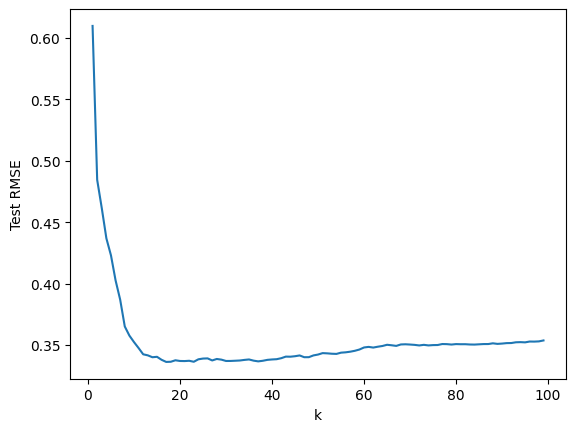

In [ ]:
ks = []
for i in range(1,100):
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=i, metric= 'cosine'))
    scores = cross_val_score(
       pipeline,
       X=df_SSA[['GDP', 'support', 'gen']],
       y = df_SSA['happy'],
       scoring= 'neg_mean_squared_error',
       cv=10)
    avg = -1*(scores.mean())
    ks.append(avg)
    print(i, avg)

line_plot = pd.Series(ks, index=range(1, 100)).plot.line()
line_plot.set_xlabel("k")
line_plot.set_ylabel("Test RMSE")

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=17 , metric= 'cosine'))

scores = cross_val_score(
    pipeline,
    X=df_SSA[['GDP', 'support', 'gen']],
    y = df_SSA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'Optimized SSA')

0.3363287439623597 Optimized SSA


*Interpretation*
---
1. Correlation and Heatmap: Across all the variables the correlation is middling at best. There is not much explaination from the variables provided.
2. Feature Choice:  The best model for prediction includes: GDP, support, and generosity. This means we can best predict a countries happiness when taking into consideration economic prosperity, community, and the kindness of the others.
3. Parameters: The best metric being cosine means that the different countries in Sub-Saharan Africa may be far from each other on the plan but they are best examined from the origin.
4. Error: The mean error for this model is 0.33, which is the highest error we've seen thus far. This means that while the model is decent at predicting happiness, the variables provided are not the best to explain happiness is Sub-Saharan Africa.  

# Latin America and Caribbean

<Axes: >

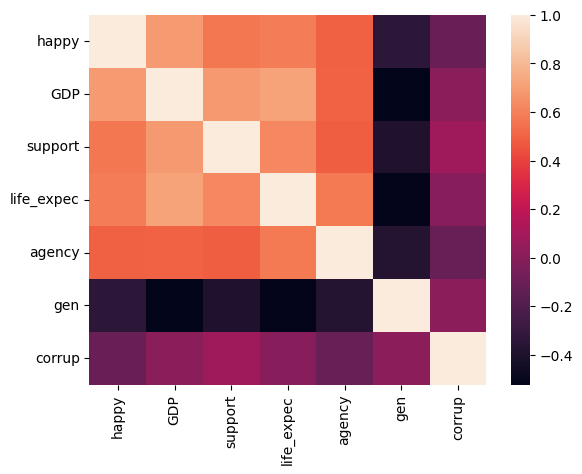

In [ ]:
df_LAC = bare_df[df.Region == 'Latin America and Caribbean']
corr_LAC = df_LAC.corr()
sns.heatmap(corr_LAC)

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_LAC[['GDP', 'support', 'life_expec', 'agency', 'gen', 'corrup']],
    y = df_LAC['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'LAC all factors')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_LAC[['GDP', 'support', 'life_expec', 'agency', 'gen']],
    y = df_LAC['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'LAC 1')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_LAC[['GDP', 'support', 'life_expec', 'agency']],
    y = df_LAC['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'LAC 2')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_LAC[['GDP', 'support', 'life_expec']],
    y = df_LAC['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'LAC 3')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP',
     'life_expec', 'agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_LAC[['GDP', 'life_expec', 'agency']],
    y = df_LAC['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'LAC 4')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_LAC[['GDP', 'agency']],
    y = df_LAC['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'LAC 5')

0.48508958228703714 LAC all factors
0.4770577083121692 LAC 1
0.4511627200833333 LAC 2
0.46396542941137564 LAC 3
0.4422763684497354 LAC 4
0.44302252878042336 LAC 5


In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP',
     'life_expec', 'agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_LAC[['GDP', 'life_expec', 'agency']],
    y = df_LAC['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'LAC Best Features')

0.4422763684497354 LAC Best Features


In [ ]:
metrics = ['cosine', 'euclidean',
           'l1', 'l2', 'manhattan']
for metric in metrics:
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=10, metric= metric))
    scores = cross_val_score(
     pipeline,
     X=df_LAC[['GDP', 'life_expec', 'agency']],
     y = df_LAC['happy'],
     scoring= 'neg_mean_squared_error',
     cv=10)
    print(metric, -scores.mean())

cosine 0.5341174238306878
euclidean 0.4422763684497354
l1 0.41410826254497357
l2 0.4422763684497354
manhattan 0.41410826254497357


1 0.6934673203703704
2 0.5400264354166666
3 0.5323155155202821
4 0.48941552849702374
5 0.4386433773121693
6 0.4367306826829805
7 0.4300661971601338
8 0.41445348999669307
9 0.41184460480599644
10 0.41410826254497357
11 0.4074011839695658
12 0.40519506865446797
13 0.4157597465984157
14 0.4132968888308498
15 0.4182684523398
16 0.42145706529999594
17 0.4213015035654785
18 0.4184898414360016
19 0.4238052211336088
20 0.42769248535085963
21 0.43489877058303017
22 0.4335296009915167
23 0.43613526391164303
24 0.43839756712342925
25 0.4355171294641271
26 0.437316445762304
27 0.43331378097633194
28 0.4296887195556297
29 0.43127509796680075


Text(0, 0.5, 'Test RMSE')

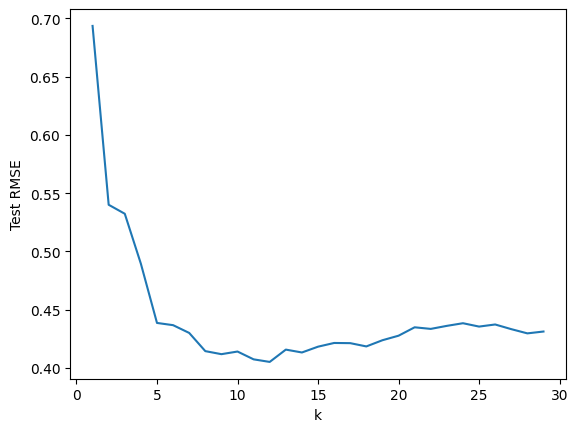

In [ ]:
ks = []
for i in range(1,30):
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=i, metric= 'manhattan'))
    scores = cross_val_score(
     pipeline,
     X=df_LAC[['GDP', 'life_expec', 'agency']],
     y = df_LAC['happy'],
     scoring= 'neg_mean_squared_error',
     cv=10)
    avg = -1*(scores.mean())
    ks.append(avg)
    print(i, avg)

line_plot = pd.Series(ks, index=range(1, 30)).plot.line()
line_plot.set_xlabel("k")
line_plot.set_ylabel("Test RMSE")

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP',
     'life_expec', 'agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=12, metric= 'manhattan'))

scores = cross_val_score(
    pipeline,
    X=df_LAC[['GDP', 'life_expec', 'agency']],
    y = df_LAC['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'Optimized LAC')

0.40519506865446797 Optimized LAC


*Interpretation*
---
1. Correlation and Heatmap: There is a high correlation between happiness and all other variables in the model, except for corruption, meaning the perception of corruption in a country has no effect on happiness of the people.
2. Feature Choice: However, The best model for prediction includes: GDP life_expec, and agency. This means we can best predict a countries happiness when taking into consideration economic prosperity, health and freedom to make choices.
3. Parameters: The metric to best predict happiness is 'manhattan' which means that nearby neighbors are best at helping predict happiness.
4. Error: The mean error for this model is 0.4. This is higher than any other model we've seen. This means that the variables we are using to evalutate are not the best aspects of a country to examine.

# Commonwealth of Independant States

<Axes: >

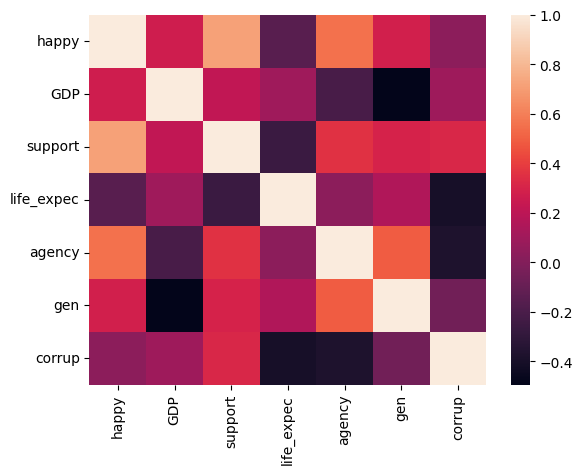

In [ ]:
df_CIS = bare_df[df.Region == 'Commonwealth of Independent States']
corr_CIS = df_CIS.corr()
sns.heatmap(corr_CIS)

In [ ]:

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_CIS[['GDP', 'support', 'life_expec', 'agency', 'gen', 'corrup']],
    y = df_CIS['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'CIS all factors')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_CIS[['GDP', 'support', 'life_expec', 'agency', 'gen']],
    y = df_CIS['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'CIS 1')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_CIS[['GDP', 'support', 'life_expec', 'agency']],
    y = df_CIS['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'CIS 2')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support','agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_CIS[['GDP', 'support', 'agency']],
    y = df_CIS['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'CIS 3')

0.24158984915416676 CIS all factors
0.21928730369583338 CIS 1
0.19498050987500007 CIS 2
0.1884619103208333 CIS 3


In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support','agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_CIS[['GDP', 'support', 'agency']],
    y = df_CIS['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'CIS Best Features')

0.1884619103208333 CIS Best Features


In [ ]:
metrics = ['cosine', 'euclidean',
           'l1', 'l2', 'manhattan']
for metric in metrics:
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=10, metric= metric))
    scores = cross_val_score(
    pipeline,
    X=df_CIS[['GDP', 'support', 'agency']],
    y = df_CIS['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
    print(metric, -scores.mean())

cosine 0.23840233519583345
euclidean 0.1884619103208333
l1 0.19564348094166667
l2 0.1884619103208333
manhattan 0.19564348094166667


1 0.28644759666666675
2 0.22458194291666667
3 0.21212597240740744
4 0.19738828619791668
5 0.1888041730666667
6 0.19207068052083337
7 0.18567115832482994
8 0.1868207789192708
9 0.18537848493827158
10 0.1884619103208333
11 0.19445872039600548
12 0.2013324198842593
13 0.20552125964003948
14 0.20990748753613947
15 0.21776522503333337
16 0.21766225397298183
17 0.22220665317329874
18 0.22535332535879626
19 0.22944480257733146
20 0.22910393784791666
21 0.23237147884731674
22 0.23221482424586784
23 0.231902354647133
24 0.23237273537037034
25 0.23445640946333332
26 0.2377885765902367
27 0.23950531156378602
28 0.24179383198873294
29 0.24369742706054298


Text(0, 0.5, 'Test RMSE')

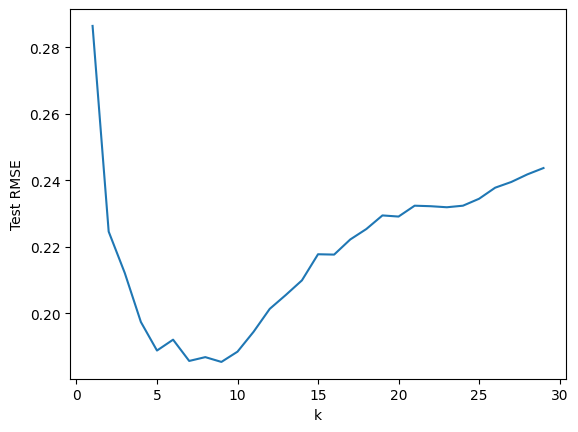

In [ ]:
ks = []
for i in range(1,30):
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=i))
    scores = cross_val_score(
    pipeline,
        X=df_CIS[['GDP', 'support', 'agency']],
        y = df_CIS['happy'],
        scoring= 'neg_mean_squared_error',
        cv=10)
    avg = -1*(scores.mean())
    ks.append(avg)
    print(i, avg)

line_plot = pd.Series(ks, index=range(1, 30)).plot.line()
line_plot.set_xlabel("k")
line_plot.set_ylabel("Test RMSE")

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support','agency']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=9))

scores = cross_val_score(
    pipeline,
    X=df_CIS[['GDP', 'support', 'agency']],
    y = df_CIS['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'Optimized CIS')

0.18537848493827158 Optimized CIS


*Interpretation*
---
1. Correlation and Heatmap: The correlation across the board is minor. There is not any real variable that stands out.
2. Feature Choice: However, The best model for prediction includes: GDP, support, and agency. This means we can best predict a countries happiness when taking into consideration economic prosperity, community, and agency.
3. Parameters: The standard parameter and a standard number of neighbors. This tells me the model doesn't need much help as is.
4. Error: The mean error for this model is 0.18, meaning that given a countries GPD, community, and agency this model could provide a predicted happiness with an error of 0.18 on a ten point scale.

# North American and ANZ

<Axes: >

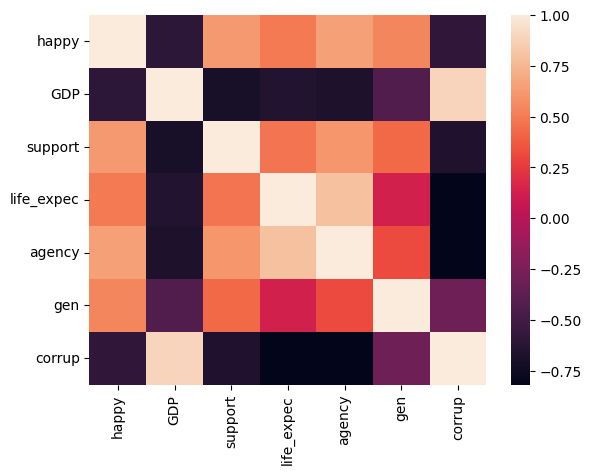

In [ ]:
df_NA = bare_df[df.Region == 'North America and ANZ']
corr_NA = df_NA.corr()
sns.heatmap(corr_NA)

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_NA[['GDP', 'support', 'life_expec', 'agency', 'gen', 'corrup']],
    y = df_NA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'NA all factors')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_NA[['GDP', 'support', 'agency', 'gen', 'corrup']],
    y = df_NA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'NA 1')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'agency', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_NA[['GDP', 'support', 'agency', 'gen']],
    y = df_NA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'NA 2')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_NA[['GDP', 'support', 'gen']],
    y = df_NA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'NA 3')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_NA[['GDP', 'support', 'gen']],
    y = df_NA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'NA 4')

0.02221274843333335 NA all factors
0.020822891266666716 NA 1
0.019543104533333334 NA 2
0.019250224666666694 NA 3
0.019250224666666694 NA 4


In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_NA[['GDP', 'support', 'gen']],
    y = df_NA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'NA Best Features')

0.019250224666666694 NA Best Features


In [ ]:
metrics = ['cosine', 'euclidean',
           'l1', 'l2', 'manhattan']
for metric in metrics:
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=10, metric= metric))
    scores = cross_val_score(
        pipeline,
        X=df_NA[['GDP', 'support', 'gen']],
        y = df_NA['happy'],
        scoring= 'neg_mean_squared_error',
        cv=10)
    print(metric, -scores.mean())

cosine 0.02245109453333336
euclidean 0.019250224666666694
l1 0.02153035403333337
l2 0.019250224666666694
manhattan 0.02153035403333337


1 0.034221563333333406
2 0.026416194166666702
3 0.023404357407407414
4 0.021802899375000028
5 0.01978996640000005
6 0.018658151111111118
7 0.019558726734693898
8 0.01918783786458336
9 0.01910923193415638
10 0.019250224666666694
11 0.019122950000000024
12 0.019668798055555586
13 0.020056428875739676
14 0.021047155357142917
15 0.02118337140740747
16 0.02135551638020835
17 0.021670877024221484
18 0.02181565574074073
19 0.022551446500461658
20 0.02311071284166665
21 0.023479935079365067
22 0.023890273698347075
23 0.024450716477630682
24 0.02444408858217595
25 0.024981269077333355
26 0.02549247392504933
27 0.02628691149062643
28 0.02686688825255102
29 0.027476145774871185


Text(0, 0.5, 'Test RMSE')

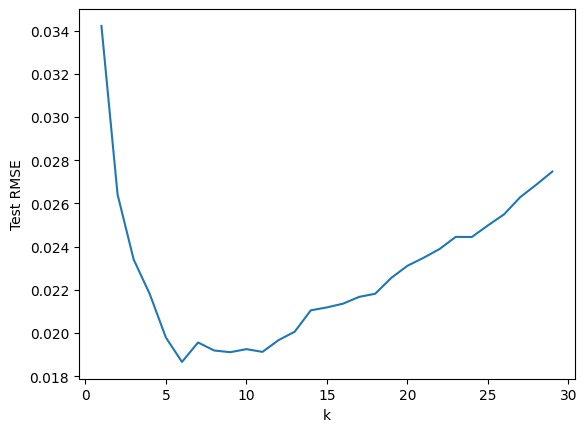

In [ ]:
ks = []
for i in range(1,30):
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=i))
    scores = cross_val_score(
        pipeline,
        X=df_NA[['GDP', 'support', 'gen']],
        y = df_NA['happy'],
        scoring= 'neg_mean_squared_error',
        cv=10)
    avg = -1*(scores.mean())
    ks.append(avg)
    print(i, avg)

line_plot = pd.Series(ks, index=range(1, 30)).plot.line()
line_plot.set_xlabel("k")
line_plot.set_ylabel("Test RMSE")

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'gen']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=6))

scores = cross_val_score(
    pipeline,
    X=df_NA[['GDP', 'support', 'gen']],
    y = df_NA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'Optimized NA')

0.018658151111111118 Optimized NA


*Interpretation*
---
1. Correlation and Heatmap: There is a high correlation between happiness and all other variables in the model. However, GDP stands out as an exception. This is interesting because every other region, there is a positive correlation from GDP, but in North America it is negative.
2. Feature Choice: However, The best model for prediction includes: GDP, support, and Generosity. This means we can best predict a countries happiness when taking into consideration economic prosperity, community, and health.
3. Parameters: The standard parameter and a standard number of neighbors. This tells me the model doesn't need much help as is.
4. Error: The mean error for this model is 0.01. This is by far the lowest error we have seen. This means the set of variables we are using to estimate happiness is extremely useful.

# Western Europe

<Axes: >

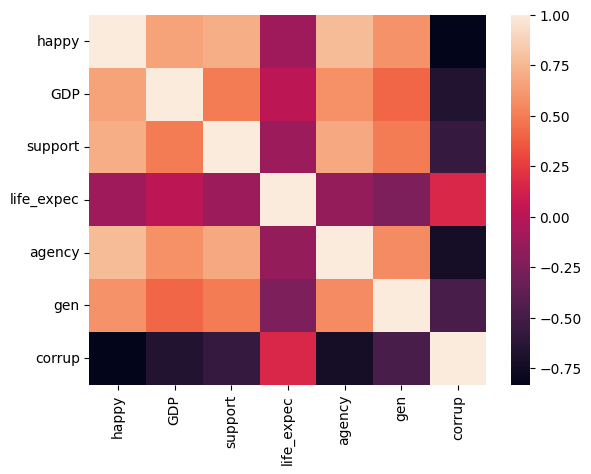

In [ ]:
df_WE = bare_df[df.Region == 'Western Europe']
corr_WE = df_WE.corr()
sns.heatmap(corr_WE)

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_WE[['GDP', 'support', 'life_expec', 'agency', 'gen', 'corrup']],
    y = df_WE['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'WE all factors')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_WE[['GDP', 'support', 'agency', 'gen', 'corrup']],
    y = df_WE['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'WE 1')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'agency', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_WE[['GDP', 'support', 'agency', 'corrup']],
    y = df_WE['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'WE 2')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'agency', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_WE[['GDP', 'agency', 'corrup']],
    y = df_WE['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'WE 3')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP','corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_WE[['GDP','corrup']],
    y = df_WE['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'WE 4')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP','corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_WE[['GDP','corrup']],
    y = df_WE['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'WE 5')

0.16081236221166667 WE all factors
0.14827548742333335 WE 1
0.13940783925166672 WE 2
0.1222089319383333 WE 3
0.07767449844499999 WE 4
0.07767449844499999 WE 5


In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP','corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_WE[['GDP','corrup']],
    y = df_WE['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'WE Best Features')

0.07767449844499999 WE Best Features


In [ ]:
metrics = ['cosine', 'euclidean',
           'l1', 'l2', 'manhattan']
for metric in metrics:
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=10, metric= metric))
    scores = cross_val_score(
        pipeline,
        X=df_WE[['GDP','corrup']],
        y = df_WE['happy'],
        scoring= 'neg_mean_squared_error',
        cv=10)
    print(metric, -scores.mean())

cosine 0.1970101665666666
euclidean 0.07767449844499999
l1 0.07647495179
l2 0.07767449844499999
manhattan 0.07647495179


1 0.12275192583333332
2 0.09924838904166666
3 0.09187891144444449
4 0.08141244981250002
5 0.07646705822000002
6 0.07680665076388891
7 0.07633619082312922
8 0.07631898065625
9 0.07531909564197528
10 0.07647495179
11 0.07507575940082643
12 0.07679089219907405
13 0.0778823085848126
14 0.07897929585714286
15 0.08095692714148148
16 0.08207515202213542
17 0.08311901437831604
18 0.08401463282047325
19 0.0847107370170822
20 0.0850004613504167
21 0.08599538303287986
22 0.08698176561122599
23 0.08678011124165101
24 0.08742718986024309
25 0.0892030390850667
26 0.09116983966469432
27 0.09187603475857344
28 0.09331209182716836
29 0.09450868698454226


Text(0, 0.5, 'Test RMSE')

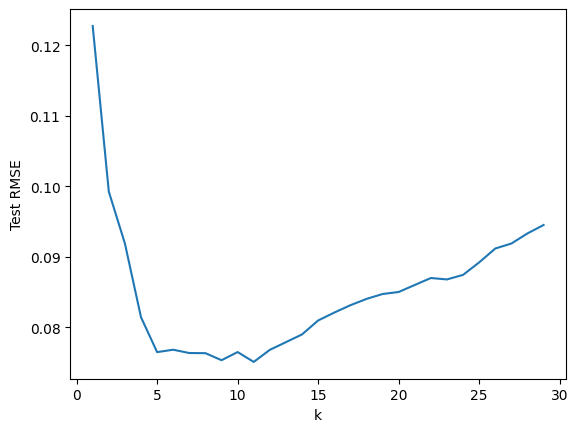

In [ ]:
ks = []
for i in range(1,30):
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=i, metric= 'manhattan'))
    scores = cross_val_score(
        pipeline,
        X=df_WE[['GDP','corrup']],
        y = df_WE['happy'],
        scoring= 'neg_mean_squared_error',
        cv=10)
    avg = -1*(scores.mean())
    ks.append(avg)
    print(i, avg)

line_plot = pd.Series(ks, index=range(1, 30)).plot.line()
line_plot.set_xlabel("k")
line_plot.set_ylabel("Test RMSE")

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP','corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=11, metric='manhattan'))

scores = cross_val_score(
    pipeline,
    X=df_WE[['GDP','corrup']],
    y = df_WE['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'Optimized WE')

0.07507575940082643 Optimized WE


*Interpretation*
---
1. Correlation and Heatmap: There is a high correlation between happiness and all other variables in the model.
2. Feature Choice: However, The best model for prediction includes: GDP and corruption. This means that we only need to address economic prosperity and corruption. This is interesting because we don't need to consider any other factor in happiness. This may be because all other factors are so high that there isn't data on low support, health, generosity, and agency.
3. Parameters: The metric used is manhattan meaning that closer neighbors offer better predictions.
4. Error: The mean error for this model is 0.07, while its not the lowest, it is very close in estimation. This means the set of data we are using is well fit to predict countries in Western Europe.

# Southeast Asia

<Axes: >

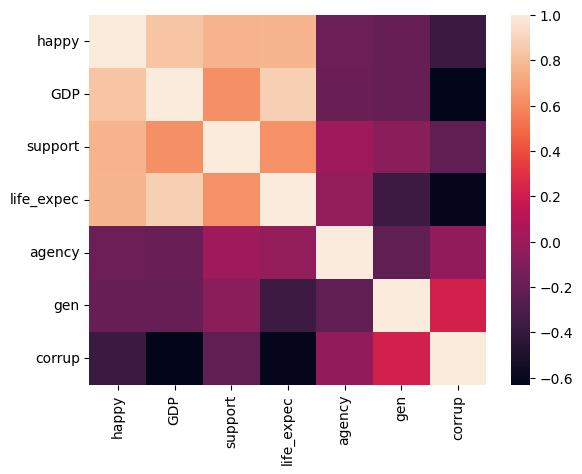

In [ ]:
df_SEA = bare_df[df.Region == 'Southeast Asia']
corr_SEA = df_SEA.corr()
sns.heatmap(corr_SEA)

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_SEA[['GDP', 'support', 'life_expec', 'agency', 'gen', 'corrup']],
    y = df_SEA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'SEA all factors')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'life_expec', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_SEA[['GDP', 'support', 'life_expec', 'gen', 'corrup']],
    y = df_SEA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'SEA 1')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'life_expec','corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_SEA[['GDP', 'support', 'life_expec', 'corrup']],
    y = df_SEA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'SEA 2')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'life_expec']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_SEA[['GDP', 'support', 'life_expec']],
    y = df_SEA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'SEA 3')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP','life_expec']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_SEA[['GDP', 'life_expec']],
    y = df_SEA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'SEA 4')

0.24780974674545453 SEA all factors
0.23666777399090905 SEA 1
0.20851778553636358 SEA 2
0.20292968171818176 SEA 3
0.1853473765363635 SEA 4


In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP','life_expec']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_SEA[['GDP', 'life_expec']],
    y = df_SEA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'SEA Best Features')

0.1853473765363635 SEA Best Features


In [ ]:
metrics = ['cosine', 'euclidean',
           'l1', 'l2', 'manhattan']
for metric in metrics:
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=10, metric= metric))
    scores = cross_val_score(
        pipeline,
        X=df_SEA[['GDP', 'life_expec']],
        y = df_SEA['happy'],
        scoring= 'neg_mean_squared_error',
        cv=10)
    print(metric, -scores.mean())

cosine 0.3748794769363637
euclidean 0.1853473765363635
l1 0.19967715820909074
l2 0.1853473765363635
manhattan 0.19967715820909074


1 0.35038240818181815
2 0.27171957181818174
3 0.23664445747474744
4 0.22507673068181816
5 0.21493226196363638
6 0.21938159853535355
7 0.22216397654916514
8 0.209954385340909
9 0.20516605810325467
10 0.19967715820909074
11 0.1927512512546957
12 0.18573506706439386
13 0.1850579070790747
14 0.18318755328849717
15 0.1807013265898989
16 0.18520195382812502
17 0.1868922106385655
18 0.19102807092873186
19 0.19161457410224125
20 0.19732272436818182
21 0.2049618383591012
22 0.2037881463974455
23 0.20644661534971648
24 0.20861746921243682
25 0.21077139652363625
26 0.21277170547606242
27 0.2127583866953484
28 0.2157425764413265
29 0.22183961109285466


Text(0, 0.5, 'Test RMSE')

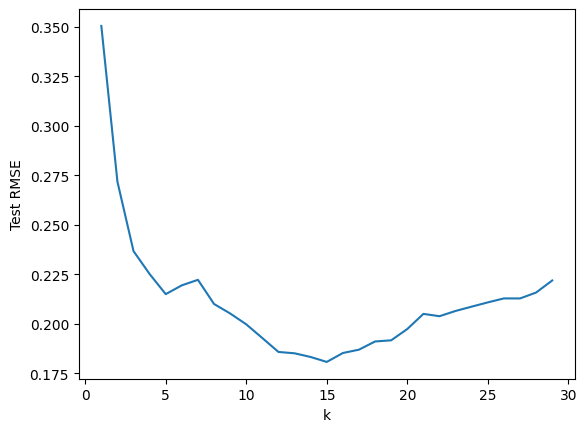

In [ ]:
ks = []
for i in range(1,30):
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=i, metric= 'manhattan'))
    scores = cross_val_score(
        pipeline,
        X=df_SEA[['GDP', 'life_expec']],
        y = df_SEA['happy'],
        scoring= 'neg_mean_squared_error',
        cv=10)
    avg = -1*(scores.mean())
    ks.append(avg)
    print(i, avg)

line_plot = pd.Series(ks, index=range(1, 30)).plot.line()
line_plot.set_xlabel("k")
line_plot.set_ylabel("Test RMSE")

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP','life_expec']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=15))

scores = cross_val_score(
    pipeline,
    X=df_SEA[['GDP', 'life_expec']],
    y = df_SEA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'Optimized SEA')

0.1839078786424242 Optimized SEA


*Interpretation*
---
1. Correlation and Heatmap: There is a high correlation between happiness and most varibles except for generosity and corruption.
2. Feature Choice: However, The best model for prediction includes: GDP and life_expec. This means we can best predict a countries happiness when taking into consideration economic prosperity and health.
3. Parameters: The standard parameter and a standard number of neighbors. This tells me the model doesn't need much help as is.
4. Error: The mean error for this model is 0.18, meaning that given a countries GPD and health this model could provide a predicted happiness with an error of 0.18 on a ten point scale.

# East Asia

<Axes: >

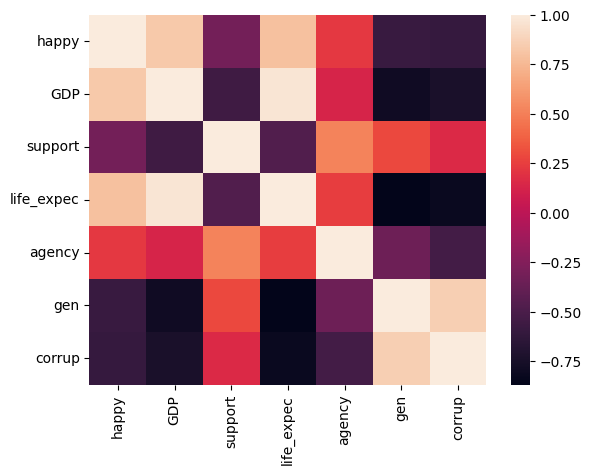

In [ ]:
df_EA = bare_df[df.Region == 'East Asia']
corr_EA = df_EA.corr()
sns.heatmap(corr_EA)

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support',
     'life_expec', 'agency', 'gen', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_EA[['GDP', 'support', 'life_expec', 'agency', 'gen', 'corrup']],
    y = df_EA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'EA all factors')

col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'life_expec', 'agency', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_EA[['GDP', 'support', 'life_expec', 'agency', 'corrup']],
    y = df_EA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'EA 1')

0.14100159274999996 EA all factors
0.13964080199999995 EA 1


In [ ]:
pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=10))

scores = cross_val_score(
    pipeline,
    X=df_EA[['GDP', 'support', 'life_expec', 'agency', 'corrup']],
    y = df_EA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'EA Best Features')

0.13964080199999995 EA Best Features


In [ ]:
metrics = ['cosine', 'euclidean',
           'l1', 'l2', 'manhattan']
for metric in metrics:
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=10, metric= metric))
    scores = cross_val_score(
        pipeline,
        X=df_EA[['GDP', 'support', 'life_expec', 'agency', 'corrup']],
        y = df_EA['happy'],
        scoring= 'neg_mean_squared_error',
        cv=10)
    print(metric, -scores.mean())

cosine 0.15929319630000005
euclidean 0.13964080199999995
l1 0.14104545750000003
l2 0.13964080199999995
manhattan 0.14104545750000003


1 0.17071027
2 0.13744061374999994
3 0.1306795344444444
4 0.14697666843749985
5 0.14550188699999983
6 0.1579608490277777
7 0.15457000030612245
8 0.15018254539062492
9 0.14864298259259248
10 0.13964080199999995
11 0.14514878516528923
12 0.14618480468750006
13 0.1480952073668639
14 0.15704003094387756
15 0.16836243344444451
16 0.1778950030273437
17 0.1829899685640139
18 0.1904924226234567
19 0.19345434051246535
20 0.19830330516249994
21 0.20608609938775505
22 0.2085352262603307
23 0.21443118621928173
24 0.21881555213541684
25 0.22619272211200023
26 0.22927013559911255
27 0.2326625669821675
28 0.23685582074617356
29 0.24238656294887048


Text(0, 0.5, 'Test RMSE')

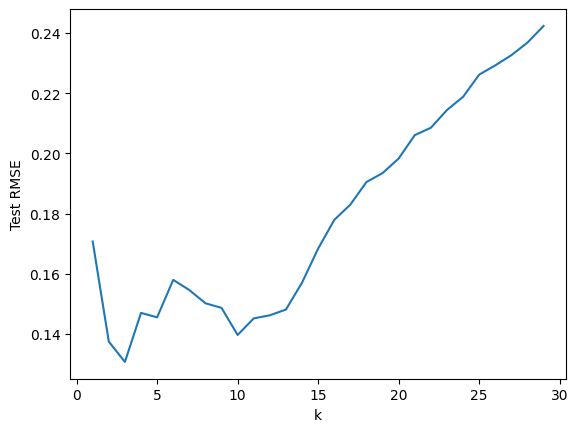

In [ ]:
ks = []
for i in range(1,30):
    pipeline = make_pipeline(
      col_trans,
      KNeighborsRegressor(n_neighbors=i))
    scores = cross_val_score(
        pipeline,
        X=df_EA[['GDP', 'support', 'life_expec', 'agency', 'corrup']],
        y = df_EA['happy'],
        scoring= 'neg_mean_squared_error',
        cv=10)
    avg = -1*(scores.mean())
    ks.append(avg)
    print(i, avg)

line_plot = pd.Series(ks, index=range(1, 30)).plot.line()
line_plot.set_xlabel("k")
line_plot.set_ylabel("Test RMSE")

In [ ]:
col_trans = make_column_transformer(
    (StandardScaler(), ['GDP', 'support', 'life_expec', 'agency', 'corrup']),
    remainder='drop')

pipeline = make_pipeline(
    col_trans,
    KNeighborsRegressor(n_neighbors=3))

scores = cross_val_score(
    pipeline,
    X=df_EA[['GDP', 'support', 'life_expec', 'agency', 'corrup']],
    y = df_EA['happy'],
    scoring= 'neg_mean_squared_error',
    cv=10)
print(-scores.mean(), 'Optimized EA')

0.1306795344444444 Optimized EA


*Interpretation*
---
1. Correlation and Heatmap: Correlation for East Asia is good across most variables but support, generosity and corruption have little correlation.
2. Feature Choice: However, The best model for prediction includes: GDP, support, life_expec, agency, corruption. This means we can best predict a countries happiness when taking into consideration economic prosperity, community, health, freedom to make choices, and level of corruption.
3. Parameters: The small numbers of neighbors points to the small number of countries present in the data set and that there is large variance in that small set.
4. Error: The mean error for this model is 0.13, meaning that given a countries GPD, community, health, agency, and corruption this model could provide a predicted happiness with an error of 0.21 on a ten point scale.

# Final Interpretation
---
Overall this model of prediction seems to be useful in understanding what makes different regions happiest. However I do want to point out the best two models and the worst two models. The best two, with the lowest error, is North America and Western Europe. Both models resulted in errors below 1%. This suggests that this type of analysis using this type of dataset is good to estimate North American and Western European countries. The models that predicted the worst were Latin America and Sub-Saharan Africa. This means that the data itself is not fitted to the countries within that region.


It is telling, I think, that the best models comes from countries that are considered "Western Civilization" and the two worst are from the global south. This communicates that the way we understand happiness and what affects is largely influenced by the dominate culture.